In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 
import pandas as pd 
import seaborn as sns


In [ ]:
df = pd.read_csv("Battery_RUL.csv")
df['RUL']

0        1112
1        1111
2        1110
3        1109
4        1107
         ... 
15059       4
15060       3
15061       2
15062       1
15063       0
Name: RUL, Length: 15064, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


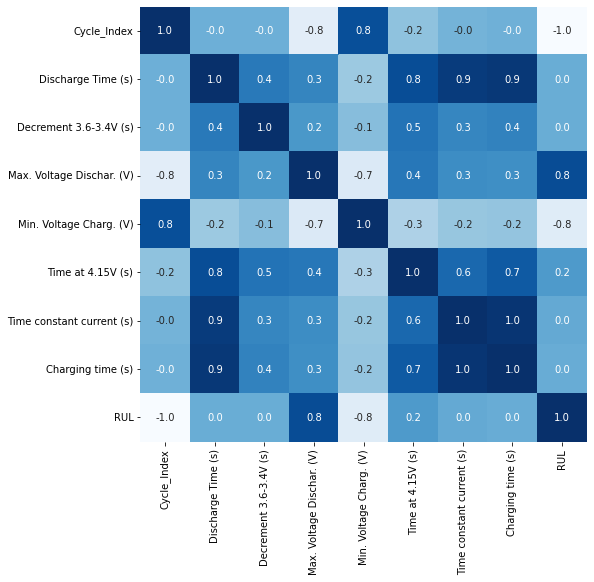

In [ ]:

plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')


In [ ]:

df['Battery ID']= 0 
b=[] 
j=1
for i in df['RUL']: 
    b.append(j) 
    if i == 0: 
        j+=1
        continue
df['Battery ID'] = b 


In [ ]:
df.columns.tolist()

['Cycle_Index',
 'Discharge Time (s)',
 'Decrement 3.6-3.4V (s)',
 'Max. Voltage Dischar. (V)',
 'Min. Voltage Charg. (V)',
 'Time at 4.15V (s)',
 'Time constant current (s)',
 'Charging time (s)',
 'RUL',
 'Battery ID']

In [ ]:
df1=df.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)','Battery ID'],axis=1)

In [ ]:
df1

,Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),RUL
0,3.670,3.211,5460.001,1112
1,4.246,3.220,5508.992,1111
2,4.249,3.224,5508.993,1110
3,4.250,3.225,5502.016,1109
4,4.290,3.398,5480.992,1107
...,...,...,...,...
15059,3.773,3.742,922.775,4
15060,3.773,3.744,915.512,3
15061,3.773,3.742,915.513,2
15062,3.763,3.839,539.375,1


**8 train 6 test**

In [ ]:

train_battery_ids = []
test_battery_ids = []
battery_ids = df['Battery ID'].unique()
for i in battery_ids:
    if i<=8:
        train_battery_ids.append(i)
    else:
        test_battery_ids.append(i)
train_data = df[df['Battery ID'].isin(train_battery_ids)]
test_data = df[df['Battery ID'].isin(test_battery_ids)]
train_data

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,Battery ID
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112,1
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111,1
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110,1
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109,1
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992000,53213.54,56699.65,1107,1
...,...,...,...,...,...,...,...,...,...,...
8624,1101.0,948.00,258.000000,3.812,3.702,1326.813000,1952.31,7172.31,4,8
8625,1102.0,948.00,255.657143,3.810,3.702,1317.875000,1916.38,7136.38,3,8
8626,1103.0,936.00,255.428571,3.810,3.704,1299.170143,1916.31,7172.31,2,8
8627,1104.0,948.00,255.016000,3.803,3.957,945.000000,1687.00,7987.00,1,8


In [ ]:
test_data

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,Battery ID
8629,1.0,2565.31,1186.496500,3.664,3.221,5439.007,6740.99,10999.07,1107,9
8630,2.0,7333.44,1196.992000,4.240,3.227,5480.992,6740.99,10683.97,1106,9
8631,3.0,7302.50,1133.984000,4.242,3.232,5460.000,6720.00,10579.10,1105,9
8632,4.0,7300.03,1099.008000,4.244,3.234,5467.004,6720.00,10483.52,1104,9
8633,6.0,64835.52,1116.496000,4.288,3.239,5467.008,107695.78,107695.78,1102,9
...,...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4,14
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3,14
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2,14
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1,14


In [ ]:
train_data=train_data.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)','Battery ID'],axis=1)
test_data=test_data.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)','Battery ID'],axis=1)
# train_data = train_data.drop('Cycle_Index', axis=1)
# test_data = test_data.drop('Cycle_Index', axis=1)
# train_data = train_data.drop('Battery ID', axis=1)
# test_data = test_data.drop('Battery ID', axis=1)
train_data

,Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),RUL
0,3.670,3.211,5460.001000,1112
1,4.246,3.220,5508.992000,1111
2,4.249,3.224,5508.993000,1110
3,4.250,3.225,5502.016000,1109
4,4.290,3.398,5480.992000,1107
...,...,...,...,...
8624,3.812,3.702,1326.813000,4
8625,3.810,3.702,1317.875000,3
8626,3.810,3.704,1299.170143,2
8627,3.803,3.957,945.000000,1


In [ ]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]
X_test

,Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s)
8629,3.664,3.221,5439.007
8630,4.240,3.227,5480.992
8631,4.242,3.232,5460.000
8632,4.244,3.234,5467.004
8633,4.288,3.239,5467.008
...,...,...,...
15059,3.773,3.742,922.775
15060,3.773,3.744,915.512
15061,3.773,3.742,915.513
15062,3.763,3.839,539.375


**Linear Regression**

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

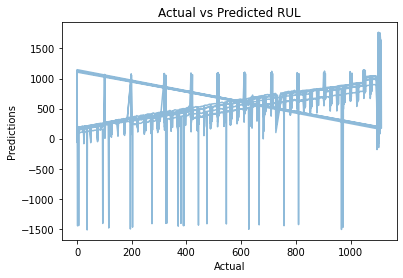

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
ax = plt.axes()
ax.plot(y_test, y_pred, alpha=.5)
ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
lr_mseloss = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

lr_r2
regr. get_params()

**Decision Tree Regressor**

[Text(0, 0.5, 'Predictions'),
 Text(0.5, 0, 'Actual'),
 Text(0.5, 1.0, 'Actual vs Predicted RUL')]

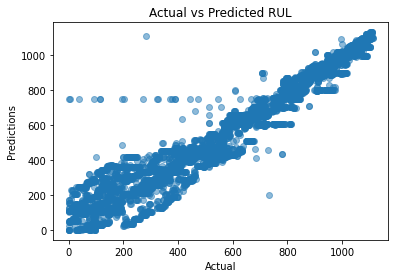

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')



In [ ]:
dtr_mseloss = mean_squared_error(y_test, y_pred)
dtr_r2 = r2_score(y_test, y_pred)

dtr_r2

0.9321179729036174

**SVR**

0.829918891962062

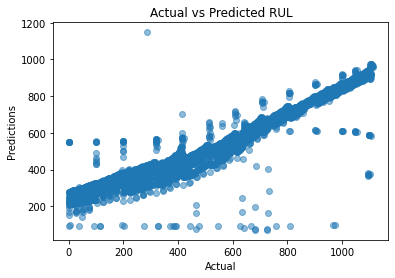

In [ ]:
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
y_pred = svr.predict(X_test)
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
svr_mseloss = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

svr_r2

**RFR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([1106.64, 1108.98, 1105.33, ...,   60.68,   93.56,    0.  ])

[Text(0, 0.5, 'Predictions'),
 Text(0.5, 0, 'Actual'),
 Text(0.5, 1.0, 'Actual vs Predicted RUL')]

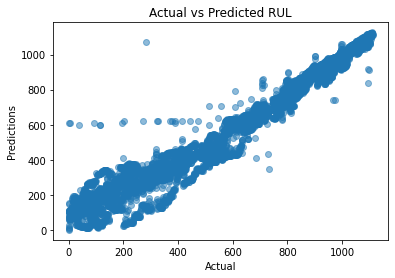

In [ ]:
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')

In [ ]:

RFR_mseloss = mean_squared_error(y_test, y_pred)
RFR_r2 = r2_score(y_test, y_pred)

RFR_r2


0.9488674819214266

**Extra Tree Regressor**

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

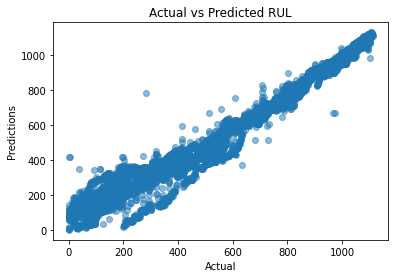

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)
y_pred = etr.predict(X_test)

ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
etr_mseloss = mean_squared_error(y_test, y_pred)
etr_r2 = r2_score(y_test, y_pred)

etr_r2
etr. get_params()

In [ ]:
new_input = [[4.267,3.086,269.983999999996]]

In [ ]:
new_output=etr.predict(new_input)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(new_output)

[1102.]


In [ ]:
# pip install --upgrade scikit-learn

In [ ]:

# pip install pycaret --ignore-installed llvmlite numba

In [ ]:
# pip install numba --upgrade

In [ ]:
# conda install -c numba llvmlite

In [ ]:
# from pycaret.regression import *

In [ ]:
# exp_reg = setup(df1, target = 'RUL',silent=True,session_id=1)

In [ ]:
# compare_models()

In [ ]:
# reg_model = create_model('et')

**9 train 5 test**

In [ ]:
df4= pd.read_csv("Battery_RUL.csv")

In [ ]:
df4['Battery ID']= 0 
b=[] 
j=1
for i in df4['RUL']: 
    b.append(j) 
    if i == 0: 
        j+=1
        continue
df4['Battery ID'] = b 


In [ ]:
train_battery_ids = []
test_battery_ids = []
battery_ids = df4['Battery ID'].unique()
for i in battery_ids:
    if i<=9:
        train_battery_ids.append(i)
    else:
        test_battery_ids.append(i)
train_data = df4[df4['Battery ID'].isin(train_battery_ids)]
test_data = df4[df4['Battery ID'].isin(test_battery_ids)]


In [ ]:
train_data=train_data.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)','Battery ID'],axis=1)
test_data=test_data.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)','Battery ID'],axis=1)


In [ ]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

0.5456735092141265

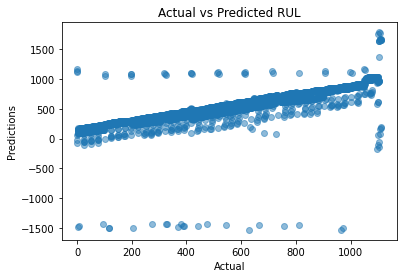

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)
ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
lr_mseloss = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

lr_r2


In [ ]:
lr_mseloss

47156.67021679941

0.9268415460922295

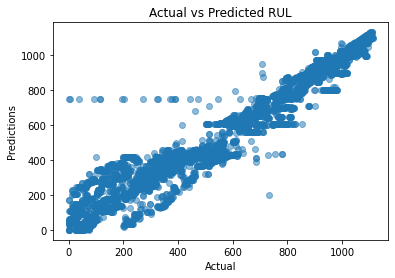

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')

dtr_mseloss = mean_squared_error(y_test, y_pred)
dtr_r2 = r2_score(y_test, y_pred)

dtr_r2

In [ ]:
dtr_mseloss

8594.81359375

0.8549898711552365

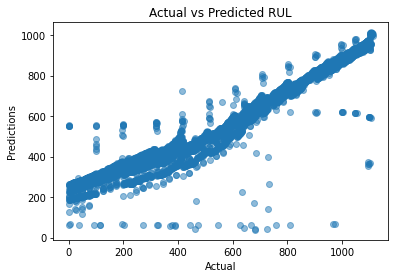

In [ ]:
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
y_pred = svr.predict(X_test)
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
svr_mseloss = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

svr_r2

In [ ]:
svr_mseloss

12215.134518384299

0.9439521041176303

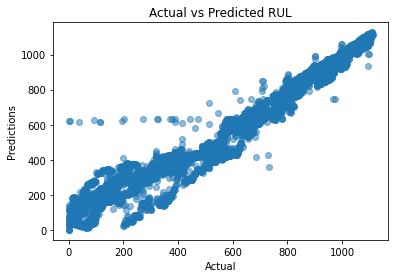

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
RFR_mseloss = mean_squared_error(y_test, y_pred)
RFR_r2 = r2_score(y_test, y_pred)

RFR_r2

0.953115703803692

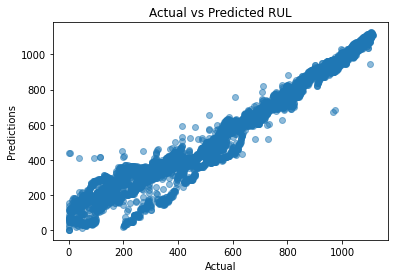

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)
y_pred = etr.predict(X_test)

ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
etr_mseloss = mean_squared_error(y_test, y_pred)
etr_r2 = r2_score(y_test, y_pred)

etr_r2

**10 train 4 test**

In [ ]:
df2= pd.read_csv("Battery_RUL.csv")


In [ ]:
df2['Battery ID']= 0 
b=[] 
j=1
for i in df2['RUL']: 
    b.append(j) 
    if i == 0: 
        j+=1
        continue
df2['Battery ID'] = b 


In [ ]:

train_battery_ids = []
test_battery_ids = []
battery_ids = df2['Battery ID'].unique()
for i in battery_ids:
    if i<=10:
        train_battery_ids.append(i)
    else:
        test_battery_ids.append(i)
train_data = df2[df2['Battery ID'].isin(train_battery_ids)]
test_data = df2[df2['Battery ID'].isin(test_battery_ids)]
train_data

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,Battery ID
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112,1
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111,1
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110,1
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109,1
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107,1
...,...,...,...,...,...,...,...,...,...,...
10782,1104.0,876.00,234.166667,3.800,3.711,1160.250,1736.25,7280.25,4,10
10783,1105.0,876.00,234.750000,3.800,3.711,1156.375,1700.38,7352.38,3,10
10784,1106.0,876.00,233.470588,3.800,3.711,1155.812,1700.31,7298.06,2,10
10785,1107.0,885.56,229.781250,3.793,3.966,780.500,1463.00,8337.00,1,10


In [ ]:
train_data=train_data.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)','Battery ID'],axis=1)
test_data=test_data.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)','Battery ID'],axis=1)

train_data

,Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),RUL
0,3.670,3.211,5460.001,1112
1,4.246,3.220,5508.992,1111
2,4.249,3.224,5508.993,1110
3,4.250,3.225,5502.016,1109
4,4.290,3.398,5480.992,1107
...,...,...,...,...
10782,3.800,3.711,1160.250,4
10783,3.800,3.711,1156.375,3
10784,3.800,3.711,1155.812,2
10785,3.793,3.966,780.500,1


In [ ]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]
X_test

,Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s)
10787,3.663,3.223,5418.016
10788,4.239,3.234,5460.000
10789,4.241,3.240,5439.008
10790,4.243,3.241,5446.016
10791,4.287,3.247,5439.008
...,...,...,...
15059,3.773,3.742,922.775
15060,3.773,3.744,915.512
15061,3.773,3.742,915.513
15062,3.763,3.839,539.375


0.537606671478086

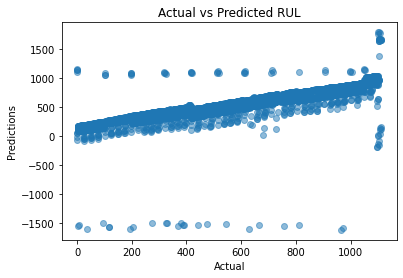

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)
ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
lr_mseloss = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

lr_r2

[Text(0, 0.5, 'Predictions'),
 Text(0.5, 0, 'Actual'),
 Text(0.5, 1.0, 'Actual vs Predicted RUL')]

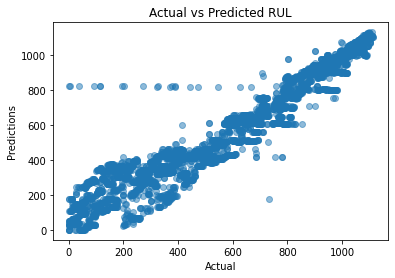

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')



In [ ]:
dtr_mseloss = mean_squared_error(y_test, y_pred)
dtr_r2 = r2_score(y_test, y_pred)

dtr_r2

0.9113533086922156

0.8696106370512413

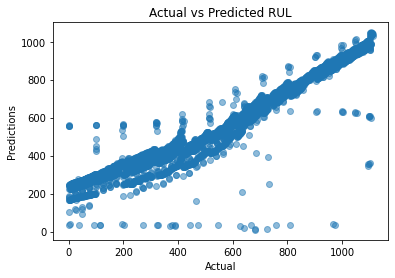

In [ ]:
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
y_pred = svr.predict(X_test)
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
svr_mseloss = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

svr_r2

0.9333044954400074

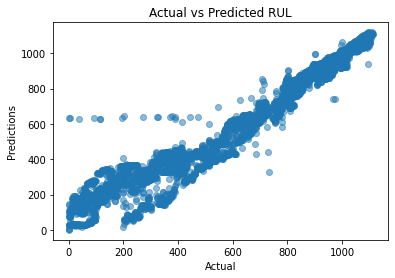

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
RFR_mseloss = mean_squared_error(y_test, y_pred)
RFR_r2 = r2_score(y_test, y_pred)

RFR_r2

0.9423957747757177

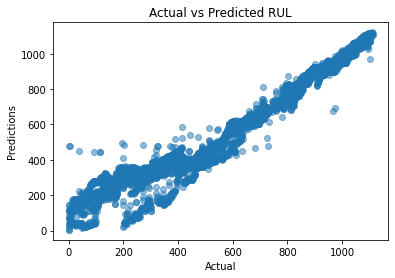

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)
y_pred = etr.predict(X_test)

ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
etr_mseloss = mean_squared_error(y_test, y_pred)
etr_r2 = r2_score(y_test, y_pred)

etr_r2

**11 train 3 test**

In [ ]:
df3= pd.read_csv("Battery_RUL.csv")

In [ ]:
df3['Battery ID']= 0 
b=[] 
j=1
for i in df3['RUL']: 
    b.append(j) 
    if i == 0: 
        j+=1
        continue
df3['Battery ID'] = b 

In [ ]:
train_battery_ids = []
test_battery_ids = []
battery_ids = df3['Battery ID'].unique()
for i in battery_ids:
    if i<=11:
        train_battery_ids.append(i)
    else:
        test_battery_ids.append(i)
train_data = df3[df3['Battery ID'].isin(train_battery_ids)]
test_data = df3[df3['Battery ID'].isin(test_battery_ids)]


In [ ]:
train_data=train_data.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)','Battery ID'],axis=1)
test_data=test_data.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)','Battery ID'],axis=1)


In [ ]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

0.5456735092141265

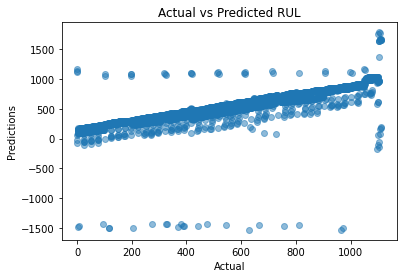

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)
ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
lr_mseloss = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

lr_r2

[Text(0, 0.5, 'Predictions'),
 Text(0.5, 0, 'Actual'),
 Text(0.5, 1.0, 'Actual vs Predicted RUL')]

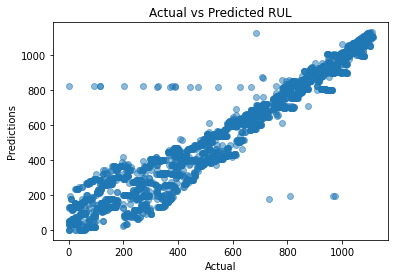

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')



In [ ]:
dtr_mseloss = mean_squared_error(y_test, y_pred)
dtr_r2 = r2_score(y_test, y_pred)

dtr_r2

0.9171940792033262

0.8823144387697271

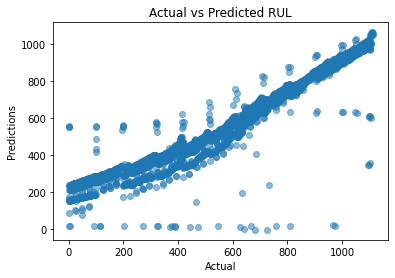

In [ ]:
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
y_pred = svr.predict(X_test)
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
svr_mseloss = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

svr_r2

0.9440075703856103

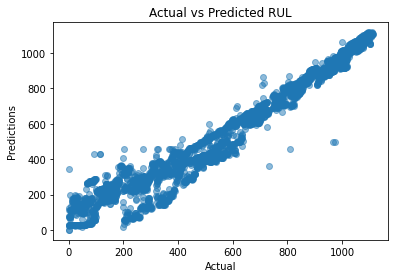

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
RFR_mseloss = mean_squared_error(y_test, y_pred)
RFR_r2 = r2_score(y_test, y_pred)

RFR_r2

0.9482227326931826

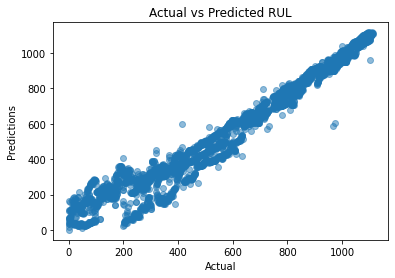

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)
y_pred = etr.predict(X_test)

ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
etr_mseloss = mean_squared_error(y_test, y_pred)
etr_r2 = r2_score(y_test, y_pred)

etr_r2